In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import jedi

In [166]:
df = pd.read_csv('Data-file-Europe-Power-Sector-2020_Clean01.csv')
# df.drop(columns = ['Unnamed: 0'])
df.head()

year     area   variable  generation_TWh  share_of_production_percent  \
0  2000  Austria     Fossil       16.418859                    27.432215   
1  2000  Austria       Coal        5.727000                     9.568527   
2  2000  Austria  Hard Coal        4.435000                     7.409886   
3  2000  Austria    Lignite        1.292000                     2.158641   
4  2000  Austria        Gas        7.851000                    13.117252   

   change_on_last_year_percent  change_on_last_year_TWh  
0                          NaN                      NaN  
1                          NaN                      NaN  
2                          NaN                      NaN  
3                          NaN                      NaN  
4                          NaN                      NaN

### Now that the data is in, in this notebook i would like to get a chart of each country and their balance of energy production ###

In [167]:
df.set_index(['year', 'area', 'variable']).head(20)

generation_TWh  share_of_production_percent  \
year area    variable                                                        
2000 Austria Fossil                 16.418859                    27.432215   
             Coal                    5.727000                     9.568527   
             Hard Coal               4.435000                     7.409886   
             Lignite                 1.292000                     2.158641   
             Gas                     7.851000                    13.117252   
             Other fossil            2.840859                     4.746435   
             Nuclear                 0.000000                     0.000000   
             Renewables             43.433614                    72.567785   
             Hydro                  41.835352                    69.897449   
             Wind and solar          0.069983                     0.116926   
             Wind                    0.066754                     0.111531   
             Solar                   0.003229                     0.005395   
             Bioenergy               1.528279                     2.553410   
             Other renewables        0.000000                     0.000000   
             Production             59.852473                          NaN   
             Net imports            -1.368000                          NaN   
             Demand                 58.484473                          NaN   
     Belgium Fossil                 33.572000                    40.559120   
             Coal                   12.916000                    15.604122   
             Hard Coal              12.916000                    15.604122   

                               change_on_last_year_percent  \
year area    variable                                        
2000 Austria Fossil                                    NaN   
             Coal                                      NaN   
             Hard Coal                                 NaN   
             Lignite                                   NaN   
             Gas                                       NaN   
             Other fossil                              NaN   
             Nuclear                                   NaN   
             Renewables                                NaN   
             Hydro                                     NaN   
             Wind and solar                            NaN   
             Wind                                      NaN   
             Solar                                     NaN   
             Bioenergy                                 NaN   
             Other renewables                          NaN   
             Production                                NaN   
             Net imports                               NaN   
             Demand                                    NaN   
     Belgium Fossil                                    NaN   
             Coal                                      NaN   
             Hard Coal                                 NaN   

                               change_on_last_year_TWh  
year area    variable                                   
2000 Austria Fossil                                NaN  
             Coal                                  NaN  
             Hard Coal                             NaN  
             Lignite                               NaN  
             Gas                                   NaN  
             Other fossil                          NaN  
             Nuclear                               NaN  
             Renewables                            NaN  
             Hydro                                 NaN  
             Wind and solar                        NaN  
             Wind                                  NaN  
             Solar                                 NaN  
             Bioenergy                             NaN  
             Other renewables                      NaN  
             Production              

In [168]:
countries_list = df['area'].unique()
countries_list[2]
### NOW WE HAVE A LIST OF COUNTRIES TO ITTERATE THROUGH IN OUR PANDAS LOOP TO GET PLOTTING.

'Bulgaria'

In [169]:
plt.figure()
temp_df = df[df['area'] == countries_list[0]].drop(columns = ['change_on_last_year_percent', 'share_of_production_percent', 'change_on_last_year_TWh'])
energy_source_list = temp_df['variable'].unique()
# energy_source_list[3]
i = 3
x = temp_df[temp_df['variable'] == energy_source_list[i]]['year']
y = temp_df[temp_df['variable'] == energy_source_list[i]]['generation_TWh']


# x, list(y)
# print(x, y)

# temp_df[temp_df['variable'] == energy_source_list[3]]


# plt.plot(x,y, label = energy_source_list[i])

# plt.xticks()

# plt.legend()
# plt.title(f'{countries_list[0]} power generation')
# plt.xlabel('Years')
# plt.ylabel('TWh')
# plt.show()


# temp_df
# for country in countries_list:
#     plt.plot(df[country]['year'])

<Figure size 921.6x633.6 with 0 Axes>

### I GOT IT ###
now that it is plotting. lets put each power source into a for loop and get a chart for a country with all their power sources.

In [170]:
# print(plt.style.available)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10710 entries, 0 to 10709
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   year                         10710 non-null  int64  
 1   area                         10710 non-null  object 
 2   variable                     10710 non-null  object 
 3   generation_TWh               10710 non-null  float64
 4   share_of_production_percent  8820 non-null   float64
 5   change_on_last_year_percent  8611 non-null   float64
 6   change_on_last_year_TWh      10200 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 585.8+ KB


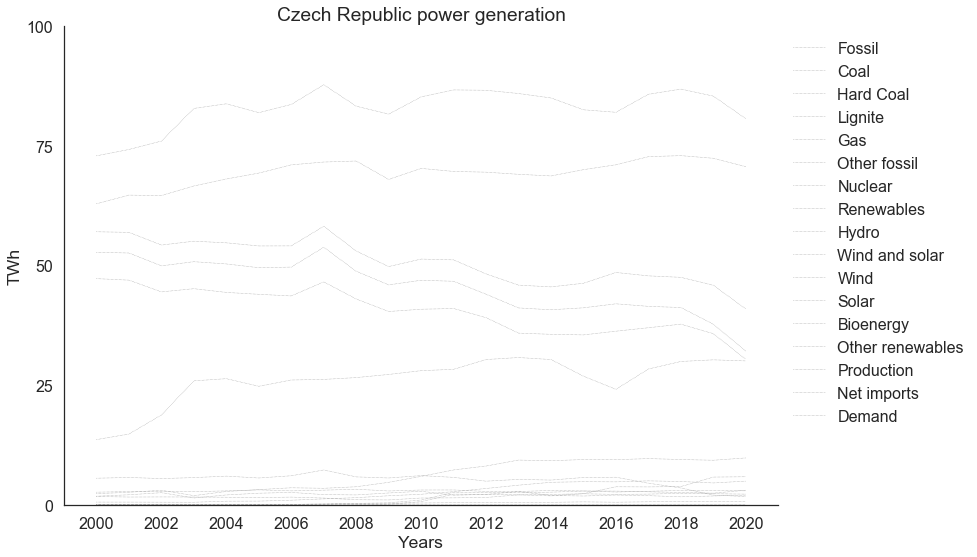

In [210]:
plt.figure()
plt.title(f'{countries_list[5]} power generation')
plt.xlabel('Years')
plt.ylabel('TWh')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

temp_df = df[df['area'] == countries_list[5]].drop(columns = ['change_on_last_year_percent', 'share_of_production_percent', 'change_on_last_year_TWh'])
energy_souce_list = temp_df['variable'].unique()

for source in energy_souce_list:
#     print(type(source))
    
    x = temp_df[temp_df['variable'] == source]['year']
    y = temp_df[temp_df['variable'] == source]['generation_TWh']
    plt.plot(x,y, label = source, color = 'grey', linestyle = ':', linewidth = .5)
plt.ylim(0)
plt.xticks(range(2000, 2021, 2))
plt.yticks(range(0, 101, 25))

plt.legend(bbox_to_anchor = (1,1))

plt.show()

got the for loop working for the power sources based on country. now lets start cleaning this up so it is more readable. - would be nice to organize the power souce by clean and dirty power. then we can have major lines and minors to show the hierarchy of information before diving deep into every power source

In [172]:
df['year']

0        2000
1        2000
2        2000
3        2000
4        2000
         ... 
10705    2020
10706    2020
10707    2020
10708    2020
10709    2020
Name: year, Length: 10710, dtype: int64

In [214]:
df['area'].nunique()

30

### Now that i have a country plotting. Lets get a group of subplots. one for each country so that we can plot them all at once. ###

there are 30 countries in the list.... there should be 27 so we will look into that. but my plan is to have 5 columns of subplots and 6 rows and fill them in alphabeticaly to start

### Converting my plotting to object based as i think i will need this to for loop through them all and place them in a grid### 
This is my first time object oriented plotting so we will see

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


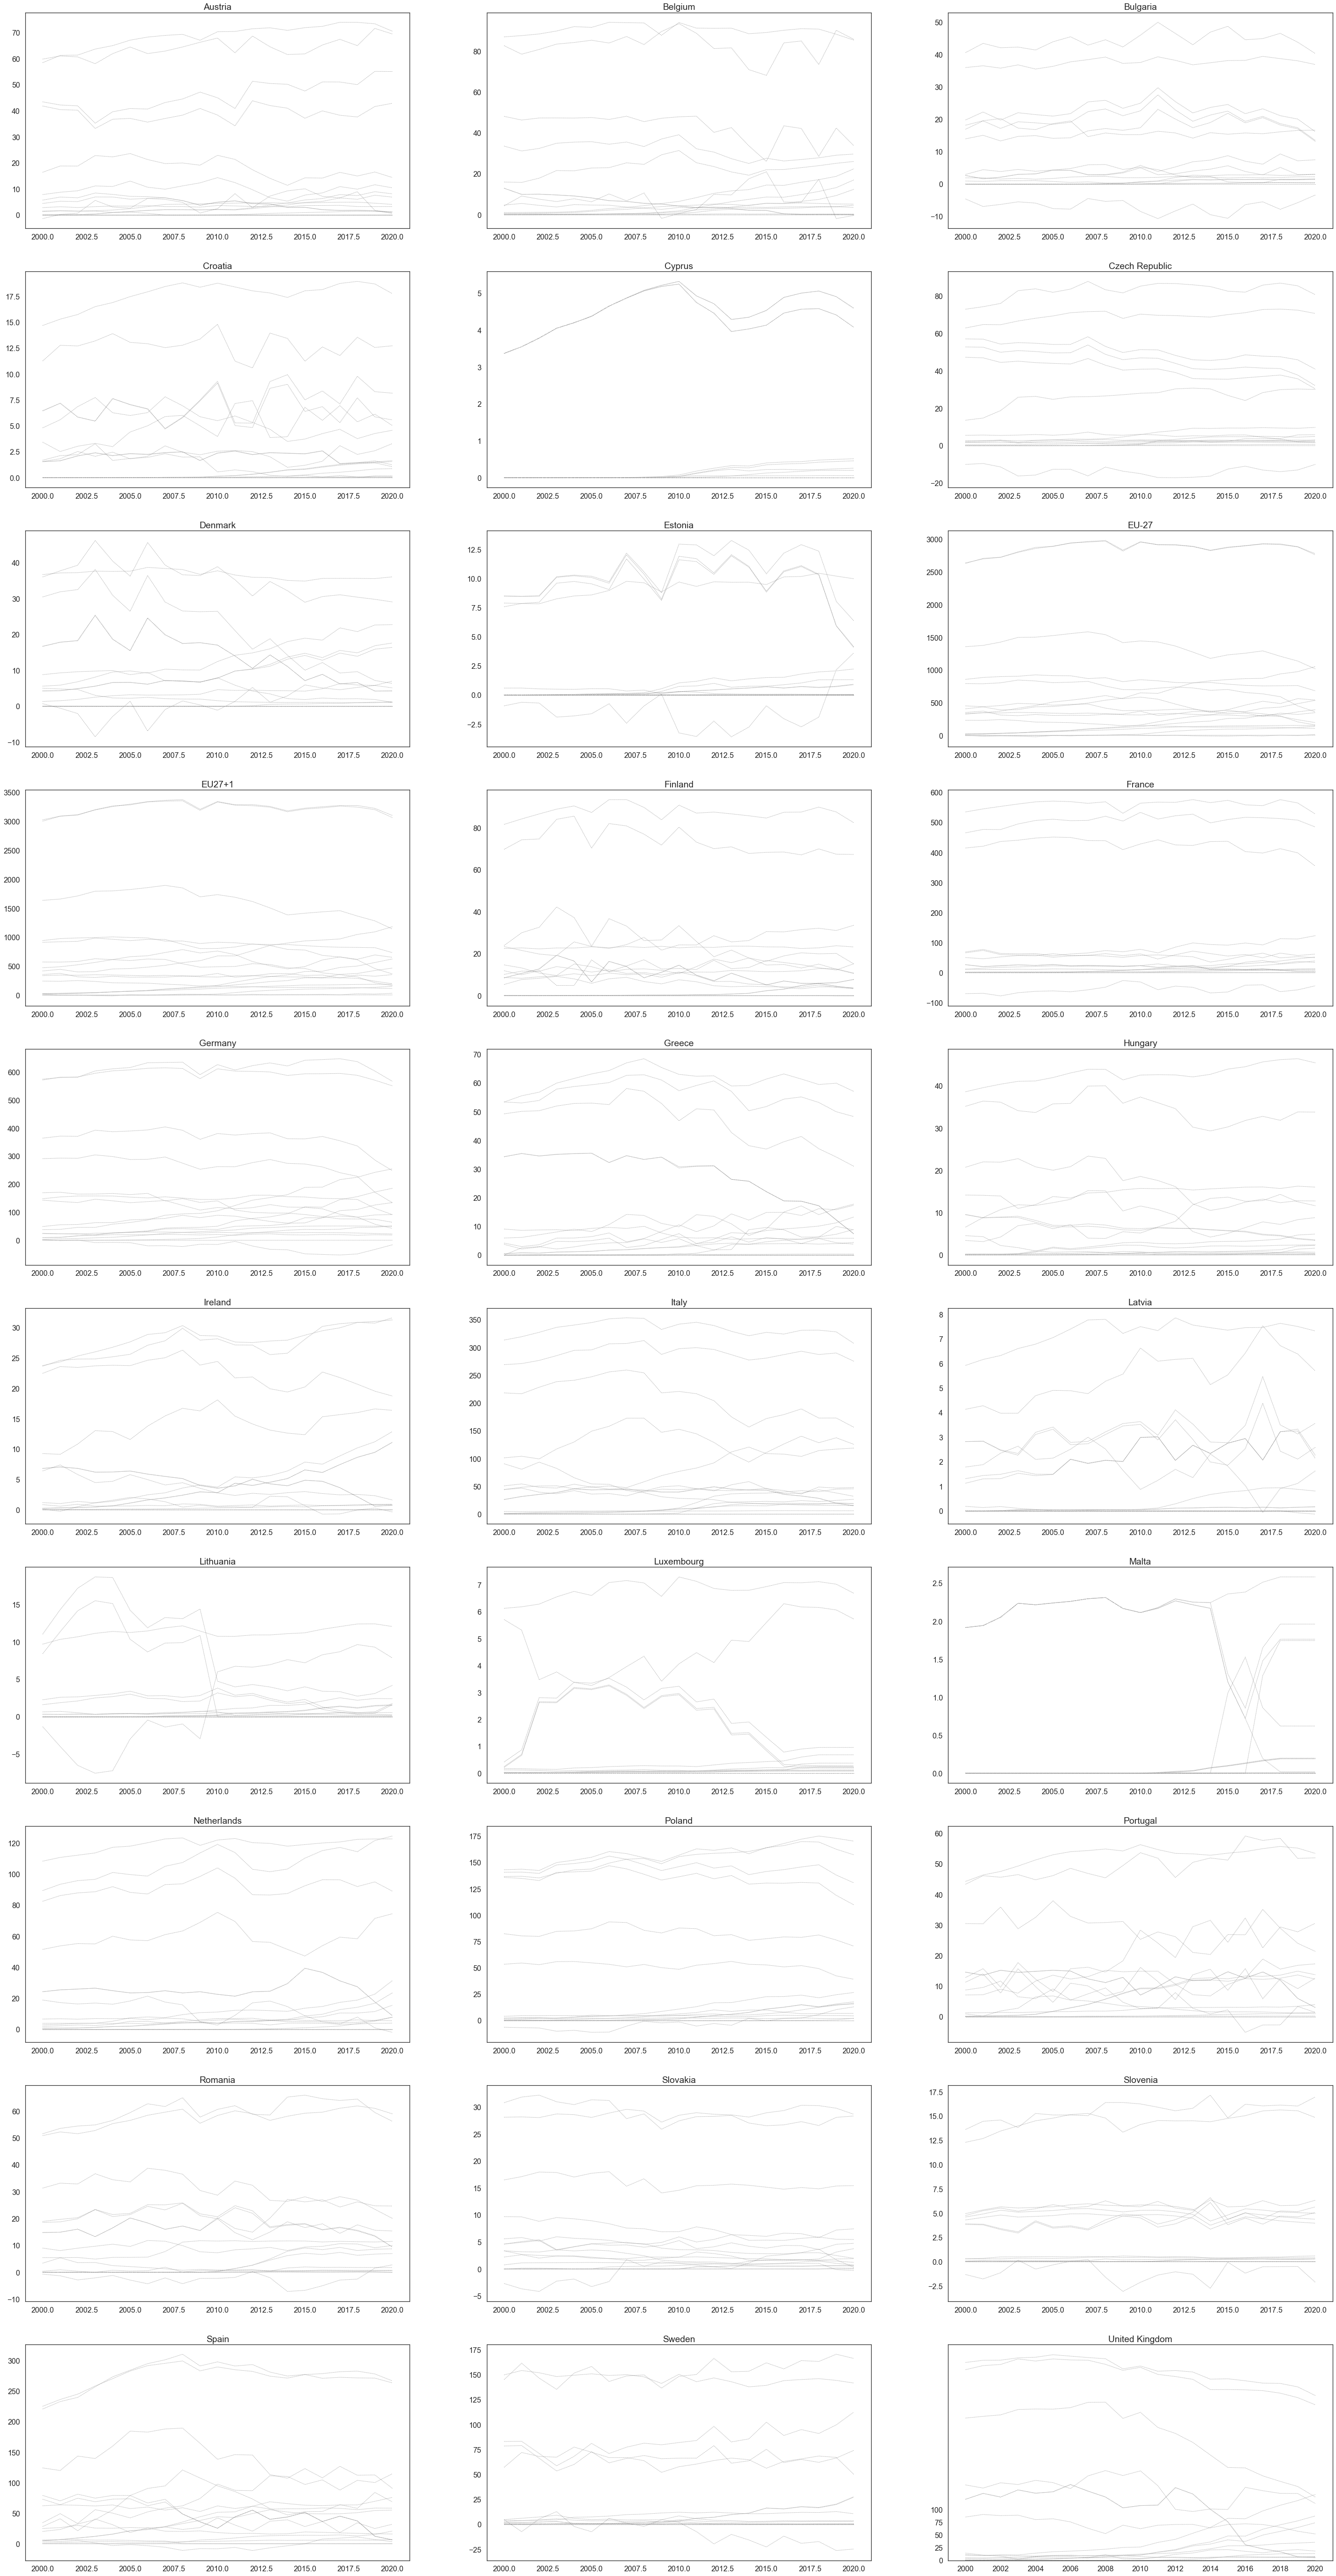

In [297]:
fig, axs = plt.subplots(10, 3, sharex = 'all', figsize = (50,100))

# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)    
i = 1    
for country in countries_list:
#     if country == 'EU-27':
#         continue
#     print(country)
    temp_df = df[df['area'] == country].drop(columns = ['change_on_last_year_percent', 'share_of_production_percent', 'change_on_last_year_TWh'])
    energy_souce_list = temp_df['variable'].unique()
#     x = temp_df[temp_df['variable'] == source]['year']
    for source in energy_souce_list:
        plt.subplot(10, 3, i)
        plt.title(country)
#         plt.xlabel('Years')
#         plt.ylabel('TWh')
#         x = temp_df[temp_df['variable'] == source]['year']
#         y[i] = temp_df[temp_df['variable'] == source]['generation_TWh']
        plt.plot(temp_df[temp_df['variable'] == source]['year'], temp_df[temp_df['variable'] == source]['generation_TWh'], color = 'grey', linestyle = ':', linewidth = 1)
    i += 1
    
plt.ylim(0)
plt.xticks(range(2000, 2021, 2))
plt.yticks(range(0, 101, 25))

# plt.legend(bbox_to_anchor = (1,1))

plt.show()

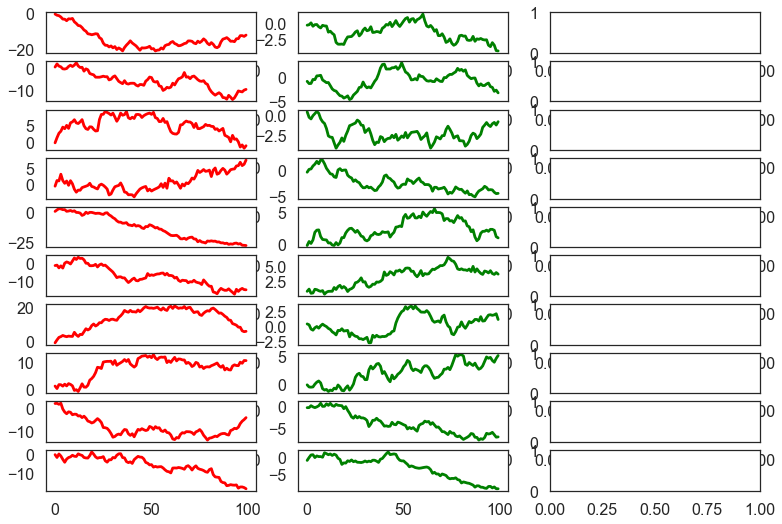

In [251]:
# def main():
#     nrows = 10
#     fig, axes = plt.subplots(nrows, 3)

#     for row in axes:
#         x = np.random.normal(0, 1, 100).cumsum()
#         y = np.random.normal(0, 0.5, 100).cumsum()
#         plot(row, x, y)

#     plt.show()

# def plot(axrow, x, y):
#     axrow[0].plot(x, color='red')
#     axrow[1].plot(y, color='green')

# main()

year            area          variable  generation_TWh  \
0      2000         Austria            Fossil       16.418859   
1      2000         Austria              Coal        5.727000   
2      2000         Austria         Hard Coal        4.435000   
3      2000         Austria           Lignite        1.292000   
4      2000         Austria               Gas        7.851000   
...     ...             ...               ...             ...   
10705  2020  United Kingdom         Bioenergy       35.468198   
10706  2020  United Kingdom  Other renewables        0.009298   
10707  2020  United Kingdom        Production      305.476470   
10708  2020  United Kingdom       Net imports       18.213088   
10709  2020  United Kingdom            Demand      323.689558   

       share_of_production_percent  change_on_last_year_percent  \
0                        27.432215                          NaN   
1                         9.568527                          NaN   
2                         7.409886                          NaN   
3                         2.158641                          NaN   
4                        13.117252                          NaN   
...                            ...                          ...   
10705                    11.610779                     4.415895   
10706                     0.003044                     0.000000   
10707                          NaN                    -4.393771   
10708                          NaN                   -13.597032   
10709                          NaN                    -4.963357   

       change_on_last_year_TWh  
0                          NaN  
1                          NaN  
2                          NaN  
3                          NaN  
4                          NaN  
...                        ...  
10705                 1.500000  
10706                 0.000000  
10707               -14.038769  
10708                -2.866151  
10709               -16.904920  

[10710 rows x 7 columns]

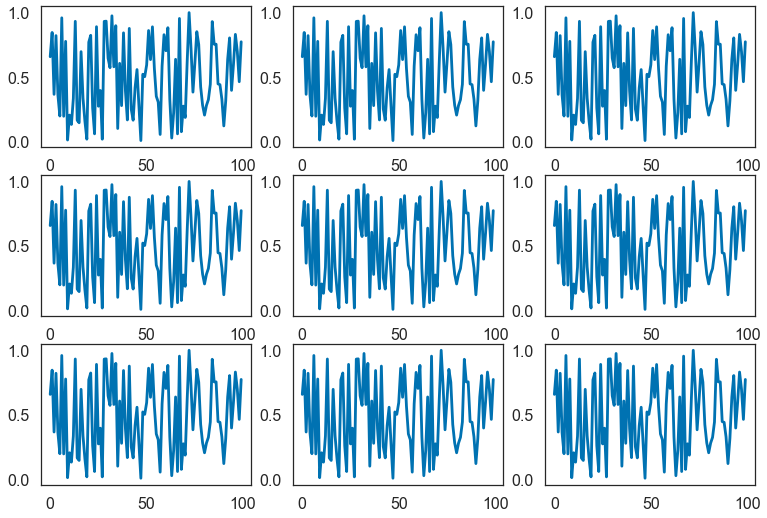

In [310]:
data = np.random.rand(100)

fig, ax = plt.subplots(3, 3)
for r in range(3) :
    for c in range(3) :
        ax[r][c].plot(data)
# ax[0][1].plot(data)

plt.show()

### nice this will help with the plotting error above

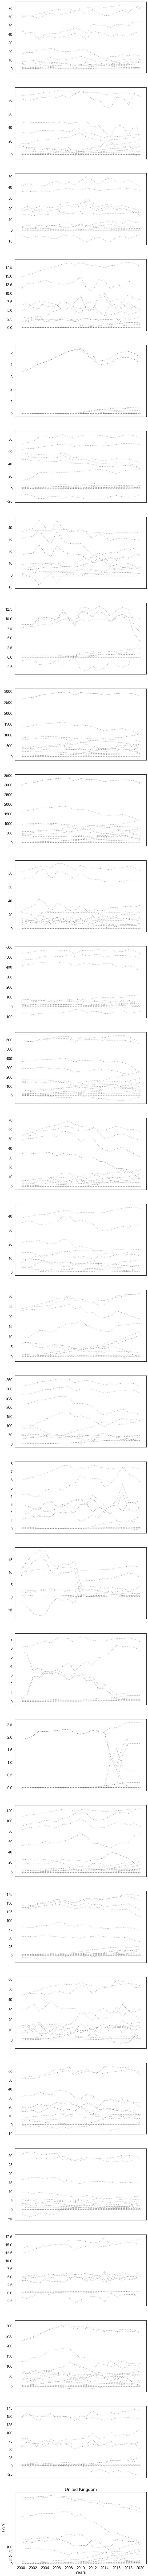

In [320]:
fig, ax = plt.subplots(30, sharex = 'all', figsize = (10,200))

# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)    
i = 0  
for country in countries_list:
    temp_df = df[df['area'] == country].drop(columns = ['change_on_last_year_percent', 'share_of_production_percent', 'change_on_last_year_TWh'])
    energy_souce_list = temp_df['variable'].unique()
    for source in energy_souce_list:
#         plt.subplot(10, 3, i)
        plt.title(country)
        plt.xlabel('Years')
        plt.ylabel('TWh')
        ax[i].plot(temp_df[temp_df['variable'] == source]['year'], temp_df[temp_df['variable'] == source]['generation_TWh'], color = 'grey', linestyle = ':', linewidth = 1)
    i += 1
    
plt.ylim(0)
plt.xticks(range(2000, 2021, 2))
plt.yticks(range(0, 101, 25))

# plt.legend(bbox_to_anchor = (1,1))

plt.show()